In [1]:
# Import Libraries 

import numpy as np 
from keras.models import Sequential
import tensorflow as tf
from keras.layers import LSTM, Input, Dropout, Dense, RepeatVector, TimeDistributed
import pandas as pd
from matplotlib import pyplot as plt
import random 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Model
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense
import seaborn as sns 

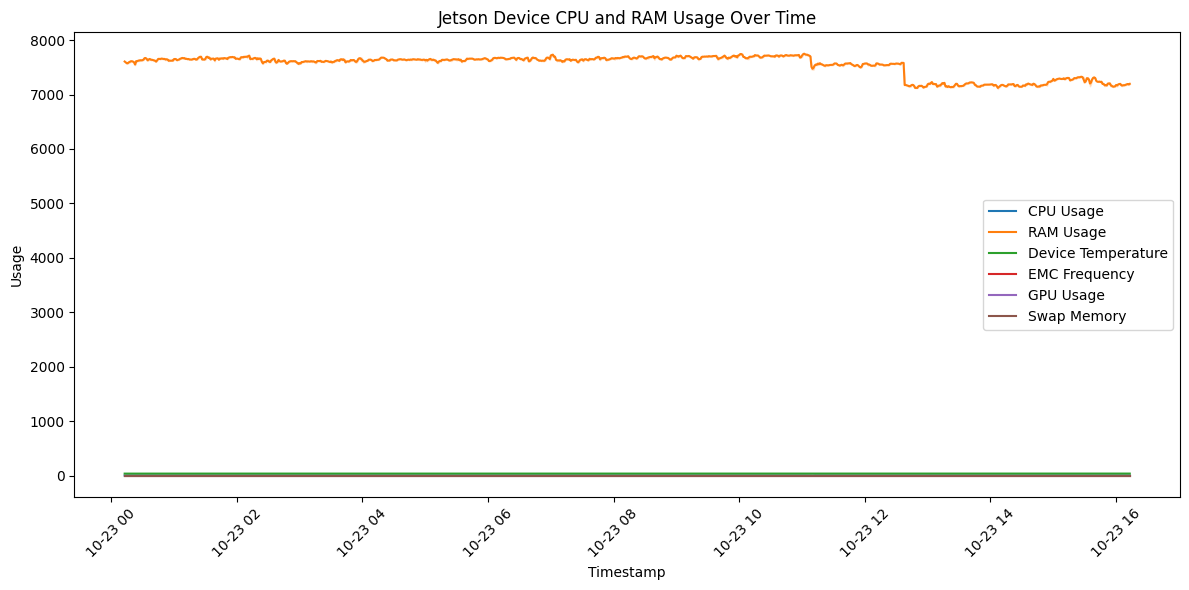

                     jetson_total_cpu_usage  jetson_ram_usage  \
timestamp                                                       
2024-10-23 00:13:00                3.666667              7606   
2024-10-23 00:14:00                3.250000              7603   
2024-10-23 00:14:00                3.333333              7586   
2024-10-23 00:14:00                3.500000              7595   
2024-10-23 00:14:00                3.416667              7575   

                     jetson_temperature  jetson_emc_freq  jetson_gpu_freq  \
timestamp                                                                   
2024-10-23 00:13:00              39.687                0                0   
2024-10-23 00:14:00              39.812                0                0   
2024-10-23 00:14:00              39.687                0                0   
2024-10-23 00:14:00              39.750                0                0   
2024-10-23 00:14:00              39.718                0                0   

    

In [18]:
# Set random seed for NumPy
np.random.seed(42)

# Set random seed for Python's built-in random module
random.seed(42)

# Set random seed for TensorFlow
tf.random.set_seed(42)

# Load the dataset
data1 = pd.read_csv('dataset/AGX03 metrics.csv')
# data2 = pd.read_csv('dataset/V1_23_Feb_180m_anomalous_data(gaussian).csv')

# dataframe = pd.concat([data1, data2], ignore_index=True)

dataframe = data1

# Convert 'timestamp' column to datetime
dataframe['timestamp'] = pd.to_datetime(dataframe['timestamp'])

# Filter relevant columns
df = dataframe[['timestamp', 'jetson_total_cpu_usage', 'jetson_ram_usage', 'jetson_temperature', 'jetson_emc_freq', 'jetson_gpu_freq', 'jetson_swap_usage']]

# Set 'timestamp' as index
df.set_index('timestamp', inplace=True)

# Create the line plot for both CPU and RAM usage
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y='jetson_total_cpu_usage', data=df, label='CPU Usage')
sns.lineplot(x=df.index, y='jetson_ram_usage', data=df, label='RAM Usage')
sns.lineplot(x=df.index, y='jetson_temperature', data=df, label='Device Temperature')
sns.lineplot(x=df.index, y='jetson_emc_freq', data=df, label='EMC Frequency')
sns.lineplot(x=df.index, y='jetson_gpu_freq', data=df, label='GPU Usage')
sns.lineplot(x=df.index, y='jetson_swap_usage', data=df, label='Swap Memory')

# Set the title and labels
plt.title('Jetson Device Metrics Over Time')
plt.ylabel('Usage')
plt.xlabel('Timestamp')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Set the background color
plt.gcf().set_facecolor('white')

# Show the legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Print the first few rows of the DataFrame
print(df.head())

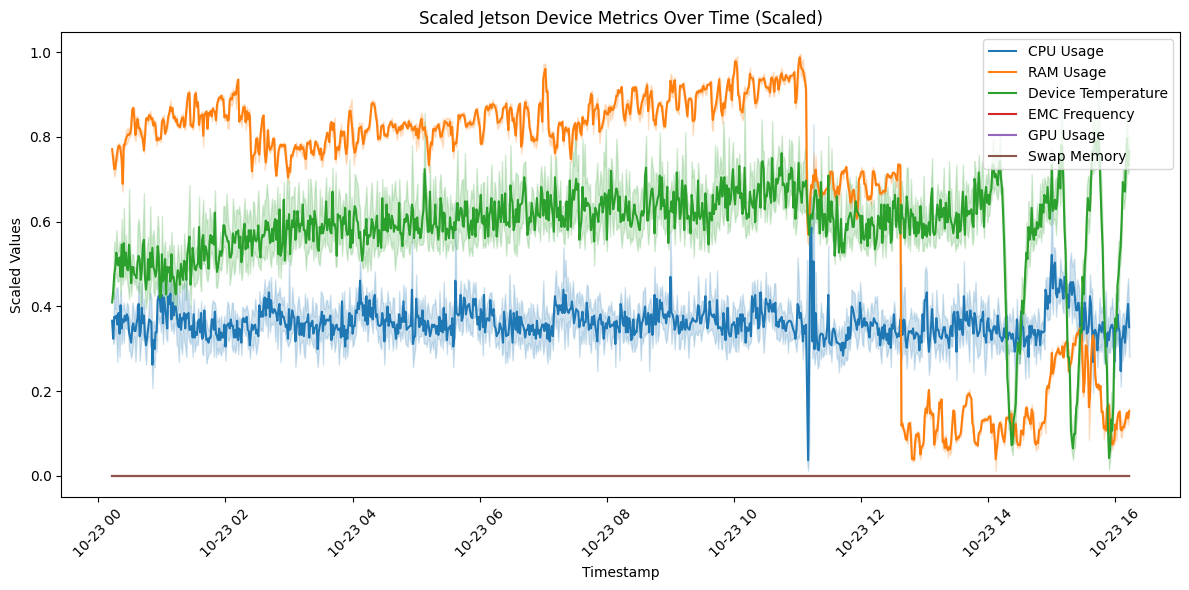

                     jetson_total_cpu_usage  jetson_ram_usage  \
timestamp                                                       
2024-10-23 00:13:00                0.365854          0.770739   
2024-10-23 00:14:00                0.304878          0.766214   
2024-10-23 00:14:00                0.317073          0.740573   
2024-10-23 00:14:00                0.341463          0.754148   
2024-10-23 00:14:00                0.329268          0.723982   

                     jetson_temperature  jetson_emc_freq  jetson_gpu_freq  \
timestamp                                                                   
2024-10-23 00:13:00            0.409113              0.0              0.0   
2024-10-23 00:14:00            0.469704              0.0              0.0   
2024-10-23 00:14:00            0.409113              0.0              0.0   
2024-10-23 00:14:00            0.439651              0.0              0.0   
2024-10-23 00:14:00            0.424140              0.0              0.0   

    

In [19]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Filter relevant columns for scaling
df_to_scale = df[['jetson_total_cpu_usage', 'jetson_ram_usage', 'jetson_temperature', 'jetson_emc_freq', 'jetson_gpu_freq', 'jetson_swap_usage']]

# Apply the MinMaxScaler to the relevant columns
df_scaled = pd.DataFrame(scaler.fit_transform(df_to_scale), columns=df_to_scale.columns, index=df.index)

# Plot the scaled values for better comparison
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_scaled.index, y='jetson_total_cpu_usage', data=df_scaled, label='CPU Usage')
sns.lineplot(x=df_scaled.index, y='jetson_ram_usage', data=df_scaled, label='RAM Usage')
sns.lineplot(x=df_scaled.index, y='jetson_temperature', data=df_scaled, label='Device Temperature')
sns.lineplot(x=df_scaled.index, y='jetson_emc_freq', data=df, label='EMC Frequency')
sns.lineplot(x=df_scaled.index, y='jetson_gpu_freq', data=df, label='GPU Usage')
sns.lineplot(x=df_scaled.index, y='jetson_swap_usage', data=df, label='Swap Memory')

# Set the title and labels
plt.title('Scaled Jetson Device Metrics Over Time (Scaled MinMax)')
plt.ylabel('Scaled Values')
plt.xlabel('Timestamp')

plt.xticks(rotation=45)
plt.gcf().set_facecolor('white')
plt.legend()
plt.tight_layout()
plt.show()

print(df_scaled.head())


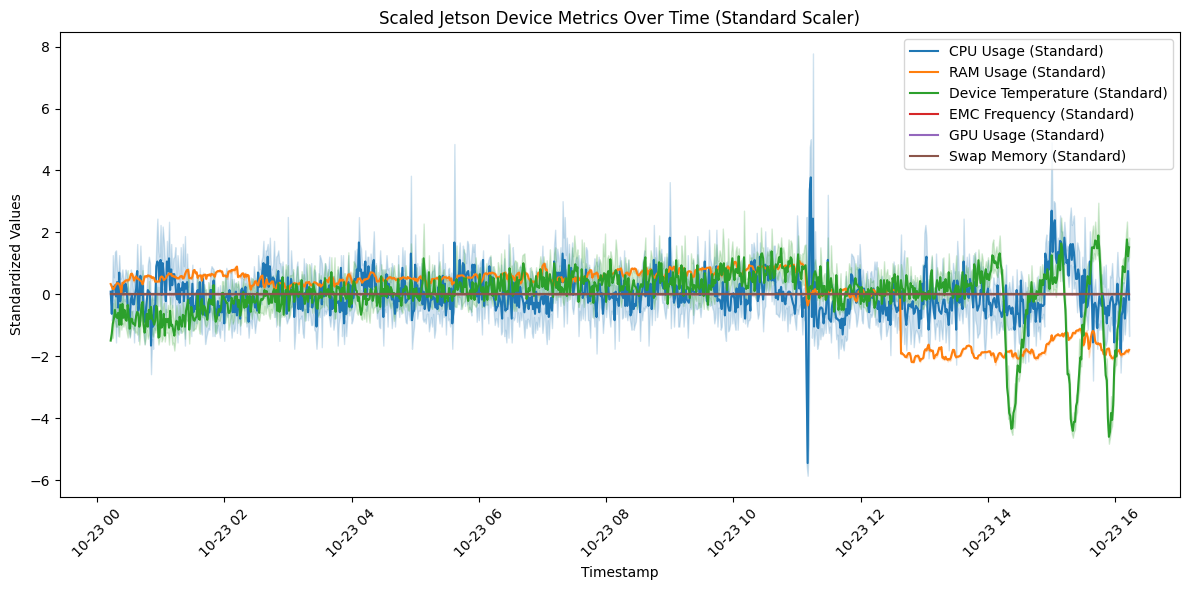

                     jetson_total_cpu_usage  jetson_ram_usage  \
timestamp                                                       
2024-10-23 00:13:00                0.087742          0.333593   
2024-10-23 00:14:00               -0.937245          0.318014   
2024-10-23 00:14:00               -0.732248          0.229737   
2024-10-23 00:14:00               -0.322253          0.276472   
2024-10-23 00:14:00               -0.527250          0.172617   

                     jetson_temperature  jetson_emc_freq  jetson_gpu_freq  \
timestamp                                                                   
2024-10-23 00:13:00           -1.493292              0.0              0.0   
2024-10-23 00:14:00           -0.981002              0.0              0.0   
2024-10-23 00:14:00           -1.493292              0.0              0.0   
2024-10-23 00:14:00           -1.235098              0.0              0.0   
2024-10-23 00:14:00           -1.366244              0.0              0.0   

    

In [20]:
# Initialize the StandardScaler
scaler_standard = StandardScaler()

# Apply the StandardScaler to the relevant columns
df_standard_scaled = pd.DataFrame(scaler_standard.fit_transform(df_to_scale), columns=df_to_scale.columns, index=df.index)

# Plot the scaled values for better comparison using StandardScaler
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_standard_scaled.index, y='jetson_total_cpu_usage', data=df_standard_scaled, label='CPU Usage (Standard)')
sns.lineplot(x=df_standard_scaled.index, y='jetson_ram_usage', data=df_standard_scaled, label='RAM Usage (Standard)')
sns.lineplot(x=df_standard_scaled.index, y='jetson_temperature', data=df_standard_scaled, label='Device Temperature (Standard)')
sns.lineplot(x=df_standard_scaled.index, y='jetson_emc_freq', data=df_standard_scaled, label='EMC Frequency (Standard)')
sns.lineplot(x=df_standard_scaled.index, y='jetson_gpu_freq', data=df_standard_scaled, label='GPU Usage (Standard)')
sns.lineplot(x=df_standard_scaled.index, y='jetson_swap_usage', data=df_standard_scaled, label='Swap Memory (Standard)')

# Set the title and labels
plt.title('Scaled Jetson Device Metrics Over Time (Standard Scaler)')
plt.ylabel('Standardized Values')
plt.xlabel('Timestamp')

plt.xticks(rotation=45)
plt.gcf().set_facecolor('white')
plt.legend()
plt.tight_layout()
plt.show()

# Print the first few rows of the standardized DataFrame
print(df_standard_scaled.head())
